In [136]:
import random
import pandas


In [144]:
train_file ='./train/clinicalSTS2019.train.V2.master.dataOnly.xlsx'
num_fold = 5


,sent1,sent2,score,cat1,cat2
0,"Patient arrives, via hospital wheelchair, Gai...","Complex assessment performed, Patient arrives...",3.00,exam,exam
1,oxycodone [ROXICODONE] 5 mg tablet 0.5-1 table...,pantoprazole [PROTONIX] 40 mg tablet enteric c...,1.00,med,med
2,The patient has missed 0 hours of work in the ...,In the past year the patient has the followin...,0.00,other,other
3,"Given current medication regimen, the followi...","Given current medication regimen, the followi...",3.00,plan,plan
4,The diagnosis and treatment plan were explaine...,Explained diagnosis and treatment plan; patie...,4.00,explained,explained
5,nortriptyline [PAMELOR] 50 mg capsule 1 capsul...,Tylenol Extra Strength 500 mg tablet 2 tablets...,1.00,med,med
6,Spent 25 minutes with the patient and greater ...,Spent 15 minutes with the patient and greater...,4.00,timespent,timespent
7,"Respiratory: Negative for cough, chest tightne...","HENT: Negative for congestion, rhinorrhea, sin...",2.50,signsymptom,signsymptom
8,ondansetron [ZOFRAN] 4 mg tablet 1 tablet by m...,minocycline [MINOCIN] 50 mg capsule 1 capsule ...,1.00,med,med
9,Explained diagnosis and treatment plan; patien...,Explained diagnosis and treatment plan; patie...,4.90,explained,explained


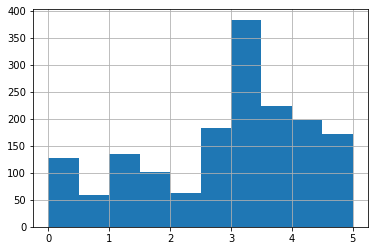

In [145]:
data = pandas.read_excel(train_file)
assert all(data.notna())
data.cat1 = data.cat1.map(lambda x: x.lower())
data.cat2 = data.cat2.map(lambda x: x.lower())

data.score.hist()
data


In [146]:
assert all([cat in data.cat2.unique() for cat in data.cat1.unique()])
assert all([cat in data.cat1.unique() for cat in data.cat2.unique()])
assert len(data.cat1.unique()) == 13

categories = list(data.cat1.unique())
categories


['exam',
 'med',
 'other',
 'plan',
 'explained',
 'timespent',
 'signsymptom',
 'sdoh',
 'consult',
 'discharge',
 'proc',
 'thankyou',
 'allergy']

In [147]:
cls_pairs = []
for row in data.itertuples():
    cls_pairs.append((row.sent1, row.cat1))
    cls_pairs.append((row.sent2, row.cat2))
assert len(cls_pairs) == 2 * len(data)


In [148]:
idxes = []
for i in range(num_fold):
    idxes += [i] * (len(cls_pairs) // num_fold)
idxes += [num_fold-1] * (len(cls_pairs) - len(idxes))
random.shuffle(idxes)

for i in range(len(cls_pairs)):
    cls_pairs[i] = (*cls_pairs[i], idxes[i], i+1)
df = pandas.DataFrame(cls_pairs, columns=['sent', 'cat', 'partition', 'ID'])
df.to_excel(train_file+f'.cls_pairs.xlsx')
cls_pairs
df


,sent,cat,partition,ID
0,"Patient arrives, via hospital wheelchair, Gai...",exam,2,1
1,"Complex assessment performed, Patient arrives...",exam,1,2
2,oxycodone [ROXICODONE] 5 mg tablet 0.5-1 table...,med,2,3
3,pantoprazole [PROTONIX] 40 mg tablet enteric c...,med,2,4
4,The patient has missed 0 hours of work in the ...,other,3,5
5,In the past year the patient has the followin...,other,0,6
6,"Given current medication regimen, the followi...",plan,0,7
7,"Given current medication regimen, the followi...",plan,1,8
8,The diagnosis and treatment plan were explaine...,explained,0,9
9,Explained diagnosis and treatment plan; patie...,explained,0,10


In [157]:
[row.ID for row in df[df.partition==1].itertuples()]


[2,
 8,
 26,
 33,
 34,
 45,
 47,
 57,
 58,
 69,
 70,
 73,
 79,
 81,
 90,
 93,
 99,
 105,
 106,
 110,
 113,
 128,
 141,
 142,
 144,
 147,
 152,
 154,
 157,
 160,
 163,
 177,
 179,
 193,
 195,
 197,
 198,
 203,
 204,
 212,
 218,
 220,
 222,
 230,
 242,
 244,
 245,
 258,
 259,
 260,
 266,
 267,
 268,
 269,
 274,
 276,
 285,
 286,
 289,
 293,
 294,
 295,
 296,
 297,
 300,
 305,
 317,
 318,
 324,
 330,
 331,
 335,
 347,
 349,
 350,
 352,
 353,
 356,
 359,
 360,
 365,
 371,
 374,
 375,
 388,
 395,
 400,
 402,
 403,
 407,
 422,
 423,
 428,
 437,
 441,
 449,
 467,
 477,
 484,
 486,
 488,
 508,
 513,
 514,
 516,
 520,
 523,
 528,
 529,
 532,
 542,
 548,
 555,
 559,
 560,
 561,
 567,
 582,
 586,
 588,
 592,
 604,
 605,
 611,
 613,
 618,
 619,
 629,
 633,
 634,
 649,
 651,
 654,
 660,
 661,
 665,
 672,
 675,
 681,
 684,
 687,
 688,
 691,
 693,
 720,
 731,
 736,
 750,
 758,
 773,
 774,
 775,
 787,
 789,
 790,
 799,
 812,
 820,
 822,
 826,
 832,
 833,
 837,
 838,
 850,
 853,
 855,
 860,
 861,
 862,